In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from helperClasses.tennis_ball_detection_pytorch import BallDetectionPytorch
import pyzed.sl as sl
import cv2
import os
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
svo_path ="C:\\FHNW_Programmiersachen\\3_Sem\\fhnw-cda2-tennis-analysis\\data\\HD1080_SN35520970_11-03-24.svo"

In [3]:
ballDetection = BallDetectionPytorch(svo_path)

In [4]:
ballDetection.calculate_background(svo_path, 'left', 100, 30)


100%|██████████| 3000/3000 [00:55<00:00, 54.18it/s]


tensor([[[ 73.,  99., 122.],
         [ 73.,  99., 122.],
         [ 73., 100., 122.],
         ...,
         [146., 156., 157.],
         [145., 156., 156.],
         [145., 157., 157.]],

        [[ 72.,  99., 123.],
         [ 72.,  99., 122.],
         [ 70.,  98., 122.],
         ...,
         [145., 155., 155.],
         [145., 155., 156.],
         [144., 156., 156.]],

        [[ 72., 100., 123.],
         [ 72.,  99., 122.],
         [ 71.,  98., 121.],
         ...,
         [143., 154., 155.],
         [143., 154., 155.],
         [143., 154., 155.]],

        ...,

        [[125., 128., 103.],
         [124., 128., 103.],
         [124., 127., 102.],
         ...,
         [156., 153., 132.],
         [156., 152., 132.],
         [156., 152., 132.]],

        [[124., 127., 102.],
         [123., 127., 102.],
         [123., 126., 101.],
         ...,
         [157., 153., 133.],
         [156., 153., 132.],
         [156., 153., 132.]],

        [[122., 126., 101.],
       

In [5]:
ballDetection.save_background('left')

In [4]:
ballDetection.calculate_background(svo_path, 'right', 100, 30)

100%|██████████| 3000/3000 [00:56<00:00, 52.77it/s]


tensor([[[ 74., 100., 122.],
         [ 74., 101., 123.],
         [ 75., 101., 123.],
         ...,
         [143., 155., 156.],
         [144., 156., 156.],
         [144., 157., 157.]],

        [[ 76., 102., 124.],
         [ 76., 103., 124.],
         [ 77., 103., 125.],
         ...,
         [140., 153., 153.],
         [141., 153., 153.],
         [142., 153., 154.]],

        [[ 75., 103., 125.],
         [ 75., 102., 125.],
         [ 75., 103., 126.],
         ...,
         [137., 150., 152.],
         [137., 151., 153.],
         [138., 152., 153.]],

        ...,

        [[125., 127., 102.],
         [124., 126., 101.],
         [123., 125., 101.],
         ...,
         [153., 152., 132.],
         [153., 151., 132.],
         [153., 151., 132.]],

        [[124., 126., 101.],
         [123., 126., 101.],
         [122., 125., 100.],
         ...,
         [151., 150., 130.],
         [151., 150., 130.],
         [152., 150., 131.]],

        [[123., 125., 100.],
       

In [5]:
ballDetection.save_background('right')

In [4]:
result_left = ballDetection.get_ball_by_frame(500, 1100, 'left', return_video=False)

100%|██████████| 600/600 [00:54<00:00, 11.08it/s]


In [17]:
balldata = ballDetection.ball_positions.copy()
balldata

array([[  500.        , -1070.85375977,  3599.26782227,  3774.07983398],
       [  501.        ,   958.83673096, -2367.07910156, -2710.36474609],
       [  502.        ,   924.40869141, -2340.32617188, -2658.08935547],
       ...,
       [ 1097.        ,  1022.31451416, -2131.11181641, -2566.05297852],
       [ 1098.        ,  1027.72924805, -2192.51513672, -2613.50244141],
       [ 1099.        ,  1014.04864502, -2209.65771484, -2612.9831543 ]])

In [18]:
from helperClasses.BaseTransformation import BaseTransformation
import pandas as pd

ball_points = balldata.copy()
ball_points[:,1]= ball_points[:,1] /1000
ball_points[:,2]= ball_points[:,2] /1000
ball_points[:,3]= np.abs(ball_points[:,3] /1000)

calibration_points = np.array([
    [0.5037602186203003, -1.451180100440979, -14.78443717956543], # service line center
    [3.287168502807617, -1.302998423576355, -11.139520645141602], # service x singles sideline
    [0.4447464346885681, -1.4366605281829834, -7.802434921264648] # baseline x singles sideline
])

baseTransformation = BaseTransformation(calibration_points)

data = pd.DataFrame(ball_points, columns=['frame','x', 'y', 'z'])
transformed_data = baseTransformation.transformData(data , [-2.5, 0, -18.28])

transformed_data

,frame,x,y,z
0,500.0,5.311961,2.444996,-15.441795
1,501.0,7.833469,-3.401442,-14.885382
2,502.0,7.840798,-3.374445,-14.947440
3,503.0,7.801322,-3.171141,-15.200540
4,504.0,8.030857,-2.674999,-15.681263
...,...,...,...,...
595,1095.0,7.961785,-3.155554,-14.889153
596,1096.0,7.922075,-3.262032,-14.792848
597,1097.0,7.964491,-3.158801,-14.952425
598,1098.0,7.940317,-3.221391,-14.913064


In [19]:
def drawTennisField():
    plt.plot([4.11, 4.11], [-11.89, 11.89], 'k', lw=2) # Single sideline rechts
    plt.plot([5.48, 5.48], [-11.89, 11.89], 'k', lw=2) # Double sideline rechts
    plt.plot([-4.11, -4.11], [-11.89, 11.89], 'k', lw=2) # Single sideline links
    plt.plot([-5.48, -5.48], [-11.89, 11.89], 'k', lw=2) # Double sideline links
    plt.plot([0, 0], [-6.41, 6.39], 'k', lw=2) # Center Service Line
    plt.plot([-5.48, 5.48], [0, 0], 'k', lw=2) # Net
    plt.plot([-5.48, 5.48], [11.89, 11.89], 'k', lw=2) # Baseline oben
    plt.plot([-5.48, 5.48], [-11.89, -11.89], 'k', lw=2) # Baseline unten
    plt.plot([-4.11, 4.11], [-6.40, -6.40], 'k', lw=2) # Service Line unten
    plt.plot([-4.11, 4.11], [6.40, 6.40], 'k', lw=2) # Service Line oben

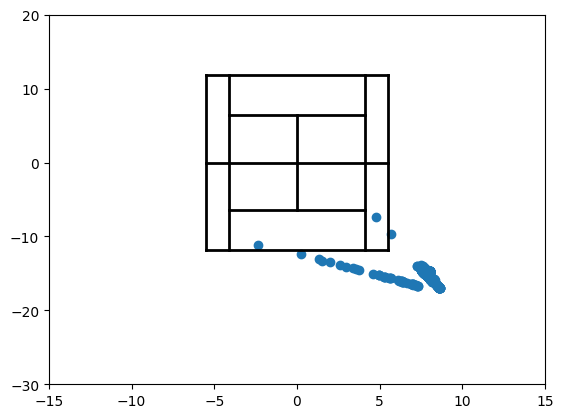

In [20]:
drawTennisField()
plt.scatter(transformed_data['x'], transformed_data['z'])
plt.xlim(-15, 15)
plt.ylim(-30,20)
plt.show()

In [5]:
zed = sl.Camera()

init_params = sl.InitParameters()
init_params.set_from_svo_file(svo_path)
init_params.depth_mode = sl.DEPTH_MODE.ULTRA
init_params.coordinate_units = sl.UNIT.METER
init_params.depth_maximum_distance = 40
init_params.depth_minimum_distance = 1
init_params.sdk_verbose = True

zed.open(init_params)
runtime_parameters = sl.RuntimeParameters()

cloud = sl.Mat()

zed.grab(runtime_parameters)
zed.set_svo_position(530)

zed.retrieve_measure(cloud, sl.MEASURE.XYZRGBA)

point_cloud = cloud.get_data()

cv2.imshow("ZED", point_cloud)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [5]:
ballDetection.ball_positions

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 

In [7]:
import pandas as pd
ballposition_df = pd.DataFrame(ballDetection.ball_positions, columns=['frame','x', 'y', 'z'])

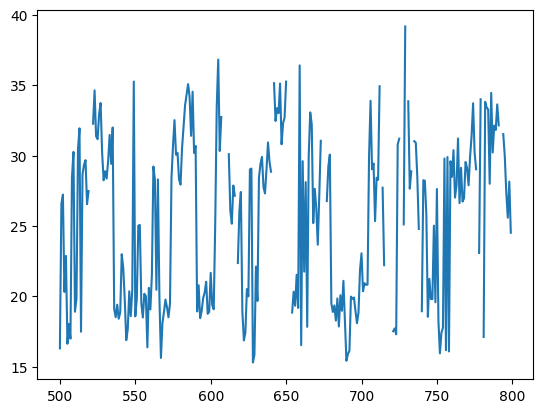

In [8]:
plt.plot(ballposition_df['frame'], ballposition_df['z'])
plt.show()


In [9]:
from helperClasses.BaseTransformation import BaseTransformation



calibration_points = np.array([
    [0.404, -1.434, -13.462], # service line center
    [3.263, -1.300, -11.118], # service x singles sideline
    [0.446, -1.444, -7.882] # baseline x singles sideline
])
baseTransformation = BaseTransformation(calibration_points)
transformed_data = baseTransformation.transformData(ballposition_df, [-1.5, 0, -18.28])

transformed_data

,frame,x,y,z
0,500,432.058140,1801.759779,411.619833
1,501,368.697994,1602.543430,366.403090
2,502,373.372129,1610.769694,371.294706
3,503,424.434825,1649.224339,404.486770
4,504,409.597556,1679.555025,397.241526
...,...,...,...,...
295,795,326.592732,1505.454082,333.442070
296,796,332.177531,1520.739779,335.161104
297,797,339.300664,1542.101943,339.411122
298,798,340.497788,1549.158724,343.922730


In [ ]:
#Tensor to numpy
result_left = result_left.cpu().numpy()

In [ ]:
result_left[60]

In [ ]:
plt.hist2d(numpyresult[:,1], numpyresult[:,0], bins=25)
plt.xlim(100, 1820)
plt.ylim(100, 980)
plt.colorbar()
plt.show()

## Profiling

In [4]:
%load_ext snakeviz

In [5]:
#svo_path = '../../data/HD1080_SN35520970_11-03-24.svo'
#ballDetection = BallDetectionPytorch(svo_path)

#%snakeviz ballDetection.get_ball_by_frame(500, 1100, 'left', True)
%snakeviz ballDetection.calculate_background(svo_path, 'right', 100, 30)

100%|██████████| 3000/3000 [00:00<00:00, 428237.82it/s]


 
*** Profile stats marshalled to file 'C:\\Users\\denis\\AppData\\Local\\Temp\\tmposoolx4m'.
Embedding SnakeViz in this document...
<function display at 0x0000027115DAAF20>


## Versuch Ballerkennung Links

In [3]:
ballDetection.calculate_background(svo_path, 'right', 100, 30)

100%|██████████| 3000/3000 [00:54<00:00, 55.27it/s]


tensor([[[ 74., 100., 122.],
         [ 74., 101., 123.],
         [ 75., 101., 123.],
         ...,
         [143., 155., 156.],
         [144., 156., 156.],
         [144., 157., 157.]],

        [[ 76., 102., 124.],
         [ 76., 103., 124.],
         [ 77., 103., 125.],
         ...,
         [140., 153., 153.],
         [141., 153., 153.],
         [142., 153., 154.]],

        [[ 75., 103., 125.],
         [ 75., 102., 125.],
         [ 75., 103., 126.],
         ...,
         [137., 150., 152.],
         [137., 151., 153.],
         [138., 152., 153.]],

        ...,

        [[125., 127., 102.],
         [124., 126., 101.],
         [123., 125., 101.],
         ...,
         [153., 152., 132.],
         [153., 151., 132.],
         [153., 151., 132.]],

        [[124., 126., 101.],
         [123., 126., 101.],
         [122., 125., 100.],
         ...,
         [151., 150., 130.],
         [151., 150., 130.],
         [152., 150., 131.]],

        [[123., 125., 100.],
       

In [4]:
ballDetection.save_background('right')

In [3]:
ballDetection.load_background('right')

tensor([[[ 74., 100., 122.],
         [ 74., 101., 123.],
         [ 75., 101., 123.],
         ...,
         [143., 155., 156.],
         [144., 156., 156.],
         [144., 157., 157.]],

        [[ 76., 102., 124.],
         [ 76., 103., 124.],
         [ 77., 103., 125.],
         ...,
         [140., 153., 153.],
         [141., 153., 153.],
         [142., 153., 154.]],

        [[ 75., 103., 125.],
         [ 75., 102., 125.],
         [ 75., 103., 126.],
         ...,
         [137., 150., 152.],
         [137., 151., 153.],
         [138., 152., 153.]],

        ...,

        [[125., 127., 102.],
         [124., 126., 101.],
         [123., 125., 101.],
         ...,
         [153., 152., 132.],
         [153., 151., 132.],
         [153., 151., 132.]],

        [[124., 126., 101.],
         [123., 126., 101.],
         [122., 125., 100.],
         ...,
         [151., 150., 130.],
         [151., 150., 130.],
         [152., 150., 131.]],

        [[123., 125., 100.],
       

In [4]:
result_right = ballDetection.get_ball_by_frame(500, 1000, 'right', True)

100%|██████████| 500/500 [00:28<00:00, 17.49it/s]


In [ ]:
result_right = result_right.cpu().numpy()

In [ ]:
result_right[620]

In [ ]:
plt.imshow(ballDetection.median_background_r.cpu().numpy().astype(np.uint8))
plt.show()

In [3]:
left_test = [642, 1798]
right_test = [654, 1587]

In [4]:
ballDetection.triangulation(left_test, right_test)

[[1.90902917e+03 0.00000000e+00 9.68596313e+02 0.00000000e+00]
 [0.00000000e+00 1.90902917e+03 5.59385315e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 642]
 [1798]]
[[ 654]
 [1587]]


C:\FHNW_Programmiersachen\3_Sem\fhnw-cda2-tennis-analysis\helperClasses\tennis_ball_detection_pytorch.py:475: RuntimeWarning: invalid value encountered in divide
  point_3d = point_3d_hom[:3] / point_3d_hom[3]


array([nan, nan, nan])

In [6]:
import configparser

config = configparser.ConfigParser()
config.read('../../SN35071549.conf')
config.sections()

['LEFT_CAM_2K',
 'RIGHT_CAM_2K',
 'LEFT_CAM_FHD',
 'RIGHT_CAM_FHD',
 'LEFT_CAM_HD',
 'RIGHT_CAM_HD',
 'LEFT_CAM_VGA',
 'RIGHT_CAM_VGA',
 'LEFT_DISTO',
 'RIGHT_DISTO',
 'STEREO',
 'MISC']